In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt

In [4]:
 df = pd.read_csv('ALLActivityLevels.dat', names=['AL','AR','A','B','N1','N2','N3','tB'],  delimiter='\t')
df1 = pd.read_csv('ALLActivityLevels.dat', names=['AR','AL','A','B','N1','N2','N3','tB'],  delimiter='\t')

In [5]:
df.head(5)

,AL,AR,A,B,N1,N2,N3,tB
0,-69.2500,-69.2500,1.0,0.0,-70.0000,-70.0,0,NaN
1,-68.5375,-68.5375,0.9,0.0,-68.8777,-70.0,0,NaN
2,-67.8609,-67.8609,0.9,0.0,-67.0566,-70.0,0,NaN
3,-67.2185,-67.2185,0.9,0.0,-64.7744,-70.0,0,NaN
4,-66.6090,-66.6090,0.9,0.0,-62.2248,-70.0,0,NaN


In [6]:
df['N1']

0     -70.0000
1     -68.8777
2     -67.0566
3     -64.7744
4     -62.2248
        ...   
105   -70.4680
106   -70.4859
107   -70.5015
108   -70.5147
109   -70.5258
Name: N1, Length: 1100, dtype: float64

In [7]:
df=df[['N1','N2','AL','AR']]
df1=df1[['N1','N2','AR','AL']]

In [8]:
df1.info()
df1[990:1100]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 0 to 109
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N1      1100 non-null   float64
 1   N2      1100 non-null   float64
 2   AR      1100 non-null   float64
 3   AL      1100 non-null   float64
dtypes: float64(4)
memory usage: 43.0 KB


,N1,N2,AR,AL
0,-70.0000,-70.0000,-69.2500,-69.2500
1,-68.8777,-70.0000,-68.5375,-68.5375
2,-66.9572,-70.0000,-67.8609,-67.8609
3,-64.5097,-70.0000,-67.2185,-67.2185
4,-61.7577,-70.0000,-66.6090,-66.6090
...,...,...,...,...
105,-70.4680,-70.2623,-57.3320,-57.2768
106,-70.4859,-70.2631,-57.3425,-57.3062
107,-70.5015,-70.2633,-57.3524,-57.3335
108,-70.5147,-70.2629,-57.3618,-57.3588


In [8]:
df[0:110].head(110)

,N1,N2,AL,AR
0,-70.0000,-70.0000,-69.2500,-69.2500
1,-68.8777,-70.0000,-68.5375,-68.5375
2,-67.0566,-70.0000,-67.8609,-67.8609
3,-64.7744,-70.0000,-67.2185,-67.2185
4,-62.2248,-70.0000,-66.6090,-66.6090
...,...,...,...,...
105,-70.4399,-70.3522,-57.3157,-57.1290
106,-70.4579,-70.3497,-57.3330,-57.1689
107,-70.4735,-70.3467,-57.3491,-57.2062
108,-70.4869,-70.3433,-57.3642,-57.2410


0.97
0.94
0.9099999999999999
0.87
0.84
0.8099999999999999
0.77
0.74
0.71
0.67
0.64
0.61
0.5700000000000001
0.54
0.51


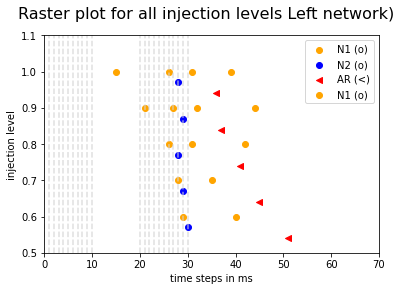

In [27]:
from matplotlib import cm

# Assuming df is your DataFrame
# Assuming columns_to_plot is the list of columns you want to iterate over
# Create a figure and axis
fig, ax = plt.subplots()
# Assuming df is your DataFrame with columns N1, N2, AL, AR
columns_to_plot = ['N1', 'N2', 'AR']


# Draw vertical lines from 0 to 10 in light gray
ax.vlines(range(11), 0.5, 1.1, color='lightgray', linestyle='--', alpha=0.7, label='Vertical Lines')
ax.vlines(range(20,31,1), 0.5, 1.1, color='lightgray', linestyle='--', alpha=0.7, label='Vertical Lines')
# Define predefined colors for each column (excluding AR and AL)
predefined_colors = {
    'N1': 'orange',
    'N2': 'blue',
    'N3': 'green',
    'N4': 'purple',
    # Add more columns and colors as needed
}

k = 1
j = 0
kk=1
for jj in range(5):
    k=kk
    # Create a copy of the original DataFrame for each iteration
    df_subset = df[j:j+110].copy()
    
    # Iterate over columns
    for i, col in enumerate(columns_to_plot):
        
    # Get the indices where col is equal to 0
        zero_indices = df_subset.index[df_subset[col] == 0].tolist()

    # Use special marker and color for columns AL and AR
        if col == 'AL':
            marker, color = '>', 'green'
        elif col == 'AR':
            marker, color = '<', 'red'
        else:
        # Use predefined colors for other columns
            color = predefined_colors.get(col, 'black')
            marker = 'o'

        
        # Plot scatter points for col == 0 with Y value of k
        ax.scatter(zero_indices, [k] * len(zero_indices), color=color, marker=marker, label=f'{col} ({marker})')
        k -= 0.03
        print(k)
    kk-=0.1  
    j += 110

# Set X and Y axis limits
ax.set_xlim(0, 70)
ax.set_ylim(0.5, 1.1)
# Add titles for X and Y axes
ax.set_xlabel('time steps in ms')
ax.set_ylabel('injection level', rotation = 90)

# Add title tothe entire figure
fig.suptitle('Raster plot for all injection levels Left network)', fontsize=16)
# Add custom legend
# Add legend for the first four columns only
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[2:6], labels[2:6],loc='upper right', bbox_to_anchor=(1.15, 1)))

# Show the plot
plt.show()

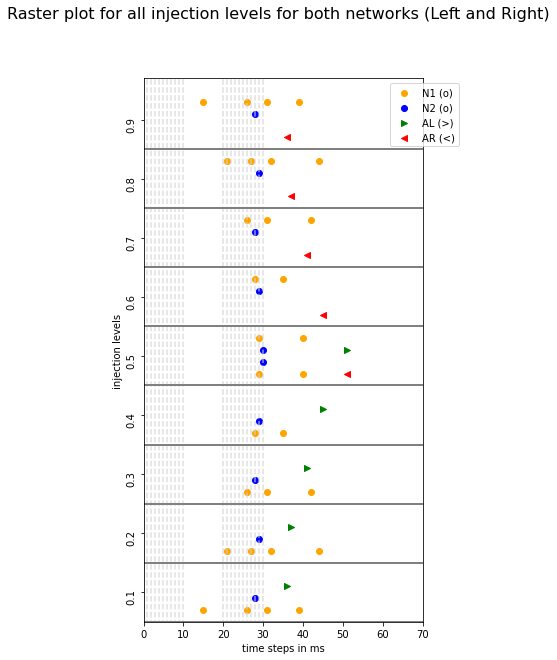

In [70]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Assuming columns_to_plot is the list of columns you want to iterate over
# Create a figure and axis
fig, ax = plt.subplots(figsize=(5, 10))
# Assuming df is your DataFrame with columns N1, N2, AL, AR
columns_to_plot = ['N1', 'N2', 'AL', 'AR']

# Draw vertical lines from 0 to 10 in light gray
ax.vlines(range(11), 0, 1.1, color='lightgray', linestyle='--', alpha=0.7, label='Vertical Lines')
ax.vlines(range(20, 31, 1), 0, 1.1, color='lightgray', linestyle='--', alpha=0.7, label='Vertical Lines')
for x in np.arange(0,1,0.1):
    ax.hlines(y=x,xmin=0, xmax=110, linewidth=2, color='grey')

# Define predefined colors for each column (excluding AR and AL)
predefined_colors = {
    'N1': 'orange',
    'N2': 'blue',
    'N3': 'green',
    'N4': 'purple',
    # Add more columns and colors as needed
}
kk=1
kk1=0.1
k = 1
k1 = 0.1
j = 0
l=990
legend_handles = []  # Store handles for legend
legend_labels = []   # Store labels for legend

for jj in range(5):
    if(j==550):
            k=kk
            k1=kk1
            k -= 0.02
            k1 += 0.02
            df_subset = df[j:j+110].copy()
            df1_subset = df1[j:j+110].copy()
            print(k)
            print(k1)
            for i, col in enumerate(columns_to_plot):
                # Get the indices where col is equal to 0
                zero_indices = df_subset.index[df_subset[col] == 0].tolist()
                zero_indices1 = df1_subset.index[df1_subset[col] == 0].tolist()

                # Use special marker and color for columns AL and AR
                if col == 'AL':
                    marker, color = '>', 'green'
                elif col == 'AR':
                    marker, color = '<', 'red'
                else:
            # Use predefined colors for other columns
                    color = predefined_colors.get(col, 'black')
                    marker = 'o'
        
        # Plot scatter points for col == 0 with Y value of k
                handle = ax.scatter(zero_indices, [k1] * len(zero_indices), color=color, marker=marker, label=f'{col} ({marker})')
                legend_handles.append(handle)
                legend_labels.append(f'{col} ({marker})')
                k -= 0.02
                k1 += 0.02
        # Plot scatter points for col == 0 with Y value of k1
                handle1 = ax.scatter(zero_indices1, [k1] * len(zero_indices1), color=color, marker=marker, label=f'{col} ({marker})')
            kk -= 0.1
            kk1 += 0.1   
            j += 110
            l -=110 
    # Create a copy of the original DataFrame for each iteration
    else:
        df_subset = df[j:j+110].copy()
        df1_subset = df1[j:j+110].copy()

    # Iterate over columns
        k=kk
        k1=kk1
        k -= 0.02
        k1 += 0.02
        for i, col in enumerate(columns_to_plot):
        # Get the indices where col is equal to 0
            zero_indices = df_subset.index[df_subset[col] == 0].tolist()
            zero_indices1 = df1_subset.index[df1_subset[col] == 0].tolist()

        # Use special marker and color for columns AL and AR
            if col == 'AL':
                marker, color = '>', 'green'
            elif col == 'AR':
                marker, color = '<', 'red'
            else:
            # Use predefined colors for other columns
                color = predefined_colors.get(col, 'black')
                marker = 'o'
        
        # Plot scatter points for col == 0 with Y value of k
            handle = ax.scatter(zero_indices, [k] * len(zero_indices), color=color, marker=marker, label=f'{col} ({marker})')
            legend_handles.append(handle)
            legend_labels.append(f'{col} ({marker})')

        # Plot scatter points for col == 0 with Y value of k1
            handle1 = ax.scatter(zero_indices1, [k1] * len(zero_indices1), color=color, marker=marker, label=f'{col} ({marker})')
            k -= 0.02
            k1 += 0.02
        # Only add the first instance of the handle to the legend
       # k-=0.02        
        kk -= 0.1
        kk1 += 0.1   
        j += 110
        l -=110  
# Set X and Y axis limits
ax.set_xlim(0, 70)
ax.set_ylim(0.1, 1.02)
# Add titles for X and Y axes
ax.set_xlabel('time steps in ms')
ax.set_ylabel('injection levels', rotation = 90)
# Set custom y-axis ticks at midpoints
yticks = [0.15, 0.25, 0.35, 0.45,0.55, 0.65, 0.75, 0.85, 0.95]

# Define a custom formatter function
def custom_formatter(x, pos):
    if x == 0.15:
        return '0.1'
    elif x == 0.25:
        return '0.2'
    elif x == 0.35:
        return '0.3'
    elif x == 0.45:
        return '0.4'
    elif x == 0.55:
        return '0.5'
    elif x == 0.65:
        return '0.6'
    elif x == 0.75:
        return '0.7'
    elif x == 0.85:
        return '0.8'
    elif x == 0.95:
        return '0.9'
    else:
        return f'{x:.2f}'

# Apply the custom formatter to the y-axis ticks
ax.yaxis.set_major_formatter(FuncFormatter(custom_formatter))
ax.set_yticks(yticks)

# Rotate y-axis tick labels by 90 degrees
ax.set_yticklabels([custom_formatter(tick, None) for tick in yticks], rotation=90)

# Add title to the entire figure
fig.suptitle('Raster plot for all injection levels for both networks (Left and Right)', fontsize=16)

# Add custom legend
ax.legend(legend_handles[:4], legend_labels[:4], loc='upper right', bbox_to_anchor=(1.15, 1))

# Show the plot
plt.show()


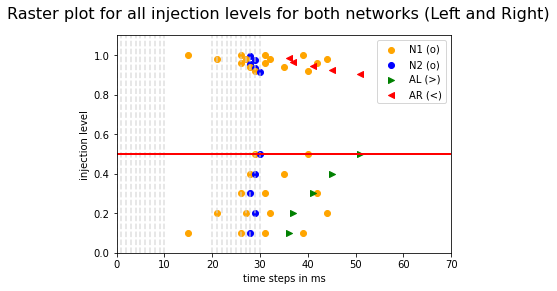

In [24]:
import matplotlib.pyplot as plt

# Assuming columns_to_plot is the list of columns you want to iterate over
# Create a figure and axis
fig, ax = plt.subplots()
# Assuming df is your DataFrame with columns N1, N2, AL, AR
columns_to_plot = ['N1', 'N2', 'AL', 'AR']

# Draw vertical lines from 0 to 10 in light gray
ax.vlines(range(11), 0, 1.1, color='lightgray', linestyle='--', alpha=0.7, label='Vertical Lines')
ax.vlines(range(20, 31, 1), 0, 1.1, color='lightgray', linestyle='--', alpha=0.7, label='Vertical Lines')
ax.hlines(y=0.5, xmin=0, xmax=110, linewidth=2, color='r')
# Define predefined colors for each column (excluding AR and AL)
predefined_colors = {
    'N1': 'orange',
    'N2': 'blue',
    'N3': 'green',
    'N4': 'purple',
    # Add more columns and colors as needed
}

# Loop for the first scatter plot
j = 0
k = 1
legend_handles = []  # Store handles for legend
legend_labels = []   # Store labels for legend

for jj in range(5):
    if j == 440:
        pass
    # Create a copy of the original DataFrame for each iteration
    df_subset = df[j:j+110].copy()

    # Iterate over columns
    for i, col in enumerate(columns_to_plot):
        # Get the indices where col is equal to 0
        zero_indices = df_subset.index[df_subset[col] == 0].tolist()

        # Use special marker and color for columns AL and AR
        if col == 'AL':
            marker, color = '>', 'green'
        elif col == 'AR':
            marker, color = '<', 'red'
        else:
            # Use predefined colors for other columns
            color = predefined_colors.get(col, 'black')
            marker = 'o'

        # Plot scatter points for col == 0 with Y value of k
        handle = ax.scatter(zero_indices, [k] * len(zero_indices), color=color, marker=marker, label=f'{col} ({marker})')
        legend_handles.append(handle)
        legend_labels.append(f'{col} ({marker})')

        k -= 0.005
    j += 110

# Loop for the second scatter plot
j = 0
k1 = 0.1
for jj in range(5):
    if j == 440:
        pass
    # Create a copy of the original DataFrame for each iteration
    df1_subset = df1[j:j+110].copy()

    # Iterate over columns
    for i, col in enumerate(columns_to_plot):
        # Get the indices where col is equal to 0
        zero_indices1 = df1_subset.index[df1_subset[col] == 0].tolist()

        # Use special marker and color for columns AL and AR
        if col == 'AL':
            marker, color = '>', 'green'
        elif col == 'AR':
            marker, color = '<', 'red'
        else:
            # Use predefined colors for other columns
            color = predefined_colors.get(col, 'black')
            marker = 'o'

        # Plot scatter points for col == 0 with Y value of k1
        handle1 = ax.scatter(zero_indices1, [k1] * len(zero_indices1), color=color, marker=marker,
                            label=f'{col} ({marker})')

    k1 += 0.1
    j += 110

# Set X and Y axis limits
ax.set_xlim(0, 70)
ax.set_ylim(0, 1.1)
# Add titles for X and Y axes
ax.set_xlabel('time steps in ms')
ax.set_ylabel('injection level', rotation=90)

# Add title to the entire figure
fig.suptitle('Raster plot for all injection levels for both networks (Left and Right)', fontsize=16)

# Add custom legend
ax.legend(legend_handles[:4], legend_labels[:4])

# Show the plot
plt.show()


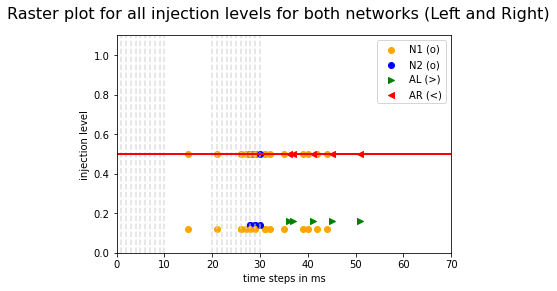

In [19]:
import matplotlib.pyplot as plt

# Assuming columns_to_plot is the list of columns you want to iterate over
# Create a figure and axis
fig, ax = plt.subplots()
# Assuming df is your DataFrame with columns N1, N2, AL, AR
columns_to_plot = ['N1', 'N2', 'AL', 'AR']

# Draw vertical lines from 0 to 10 in light gray
ax.vlines(range(11), 0, 1.1, color='lightgray', linestyle='--', alpha=0.7, label='Vertical Lines')
ax.vlines(range(20, 31, 1), 0, 1.1, color='lightgray', linestyle='--', alpha=0.7, label='Vertical Lines')
ax.hlines(y=0.5, xmin=0, xmax=110, linewidth=2, color='r')
# Define predefined colors for each column (excluding AR and AL)
predefined_colors = {
    'N1': 'orange',
    'N2': 'blue',
    'N3': 'green',
    'N4': 'purple',
    # Add more columns and colors as needed
}

# Define k1 values for each column
k1_values = {
    'N1': 0.12,
    'N2': 0.14,
    'AL': 0.16,
    'AR': 0.18,
    # Add more columns and k1 values as needed
}

j = 0
l = 990
legend_handles = []  # Store handles for legend
legend_labels = []   # Store labels for legend

for jj in range(5):
    if j == 440:
        pass
    # Create a copy of the original DataFrame for each iteration
    df_subset = df[j:j+110].copy()
    df1_subset = df1[j:j+110].copy()

    # Iterate over columns
    for i, col in enumerate(columns_to_plot):
        # Get the indices where col is equal to 0
        zero_indices = df_subset.index[df_subset[col] == 0].tolist()
        zero_indices1 = df1_subset.index[df1_subset[col] == 0].tolist()

        # Use special marker and color for columns AL and AR
        if col == 'AL':
            marker, color = '>', 'green'
        elif col == 'AR':
            marker, color = '<', 'red'
        else:
            # Use predefined colors for other columns
            color = predefined_colors.get(col, 'black')
            marker = 'o'

        # Plot scatter points for col == 0 with Y value of k
        handle = ax.scatter(zero_indices, [k] * len(zero_indices), color=color, marker=marker, label=f'{col} ({marker})')
        legend_handles.append(handle)
        legend_labels.append(f'{col} ({marker})')

        # Plot scatter points for col == 0 with custom Y value based on k1_values dictionary
        handle1 = ax.scatter(zero_indices1, [k1_values[col]] * len(zero_indices1), color=color, marker=marker,
                            label=f'{col} ({marker})')

    j += 110
    l -= 110

# Set X and Y axis limits
ax.set_xlim(0, 70)
ax.set_ylim(0, 1.1)
# Add titles for X and Y axes
ax.set_xlabel('time steps in ms')
ax.set_ylabel('injection level', rotation=90)

# Add title to the entire figure
fig.suptitle('Raster plot for all injection levels for both networks (Left and Right)', fontsize=16)
# Add custom legend
ax.legend(legend_handles[:4], legend_labels[:4])

# Show the plot
plt.show()


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px


df=df[110:220]

def replace_values(column):
    return np.array([0.9 if val == 0 else 0 for val in column])

# Applying the function to each column
for col in df.columns:
    df[col] = replace_values(df[col])

# Melt the DataFrame for 3D plotting
df_melted = pd.melt(df, var_name='Column', value_name='Values')

# Filter rows where Values are not 0
df_filtered = df_melted[df_melted['Values'] != 0]

# Creating a 3D scatter plot with Plotly
fig = px.scatter_3d(df_filtered, x=df_filtered.index, y='Values', z='Column',
                    color='Column', size_max=18, opacity=0.7, title='Interactive 3D Scatter Plot')
fig.show()

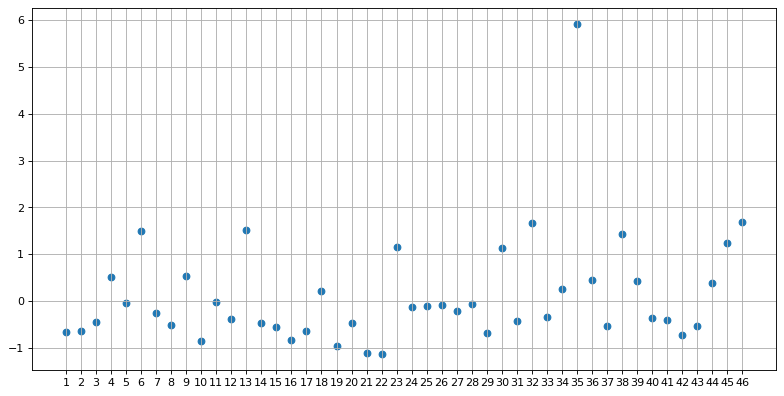

In [10]:
r = [(14.881 - 22.942) / 12.406, (14.967 - 22.942) / 12.406, (17.544 - 22.942) / 12.406, (29.406 - 22.942) / 12.406, (22.371 - 22.942) / 12.406, (41.522 - 22.942) / 12.406, (19.917 - 22.942) / 12.406, (16.707 - 22.942) / 12.406, (29.645 - 22.942) / 12.406, (12.534 - 22.942) / 12.406, (22.727 - 22.942) / 12.406, (18.127 - 22.942) / 12.406, (41.800 - 22.942) / 12.406, (17.268 - 22.942) / 12.406, (16.034 - 22.942) / 12.406, (12.606 - 22.942) / 12.406, (15.000 - 22.942) / 12.406, (25.559 - 22.942) / 12.406, (11.191 - 22.942) / 12.406, (17.132 - 22.942) / 12.406, (9.352 - 22.942) / 12.406, (9.031 - 22.942) / 12.406, (37.154 - 22.942) / 12.406, (21.512 - 22.942) / 12.406, (21.739 - 22.942) / 12.406, (21.800 - 22.942) / 12.406, (20.388 - 22.942) / 12.406, (22.318 - 22.942) / 12.406, (14.433 - 22.942) / 12.406, (36.963 - 22.942) / 12.406, (17.741 - 22.942) / 12.406, (43.529 - 22.942) / 12.406, (18.868 - 22.942) / 12.406, (26.033 - 22.942) / 12.406, (96.200 - 22.942) / 12.406, (28.588 - 22.942) / 12.406, (16.286 - 22.942) / 12.406, (40.625 - 22.942) / 12.406, (28.400 - 22.942) / 12.406, (18.444 - 22.942) / 12.406, (18.020 - 22.942) / 12.406, (14.030 - 22.942) / 12.406, (16.466 - 22.942) / 12.406, (27.778 - 22.942) / 12.406, (38.208 - 22.942) / 12.406, (43.773 - 22.942) / 12.406]
plt.figure(figsize=(12, 6), dpi=80)
plt.scatter(range(1,47),r)
plt.xticks(range(1, 47))
plt.grid()

plt.show()

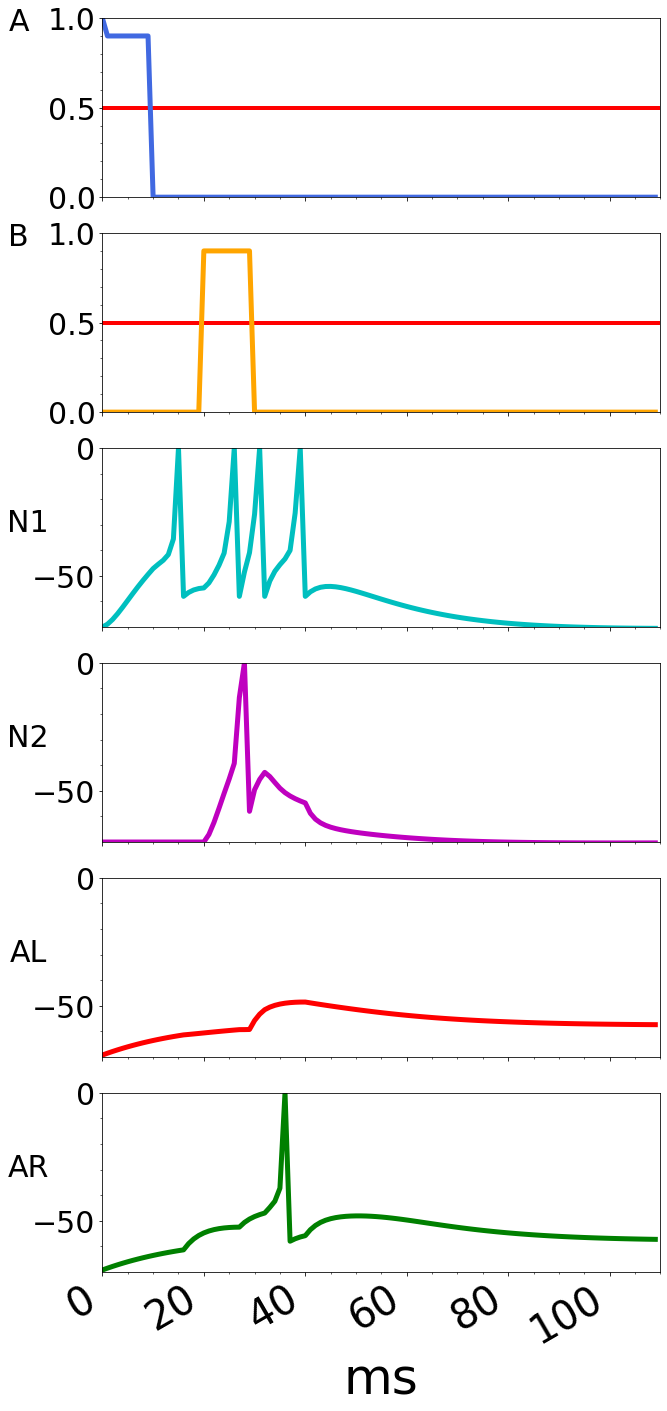

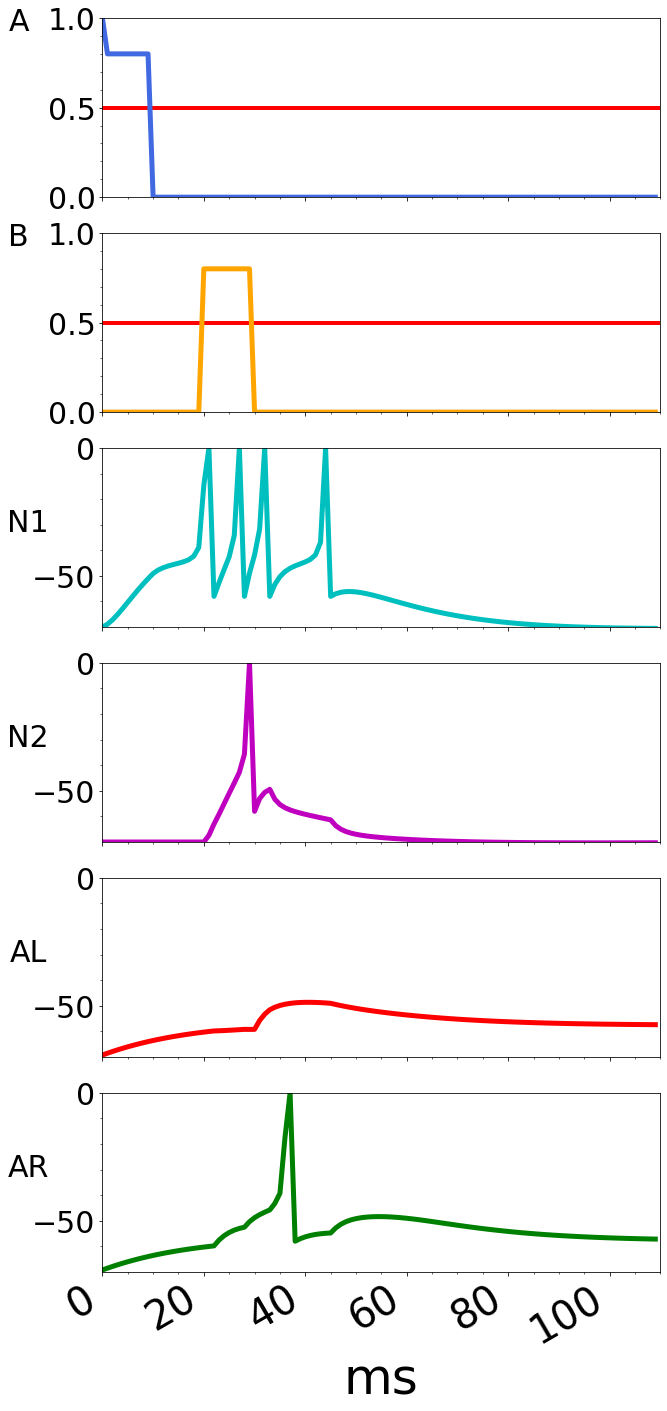

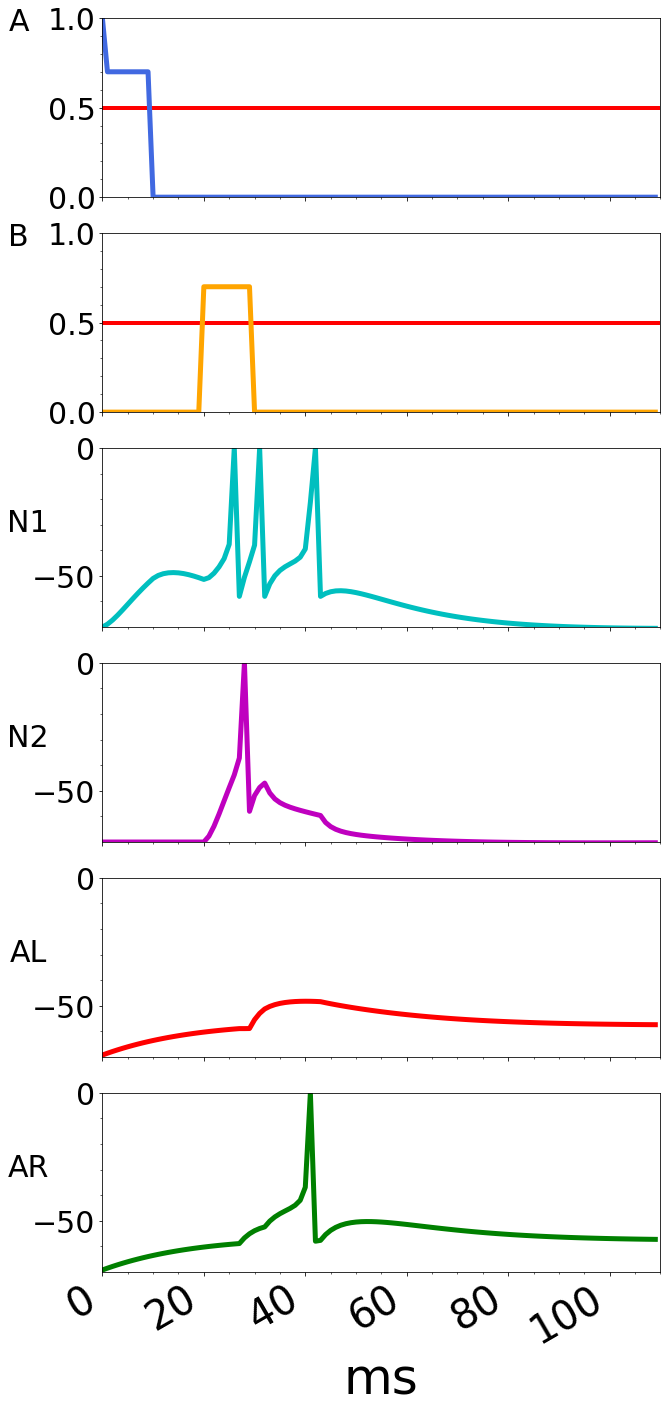

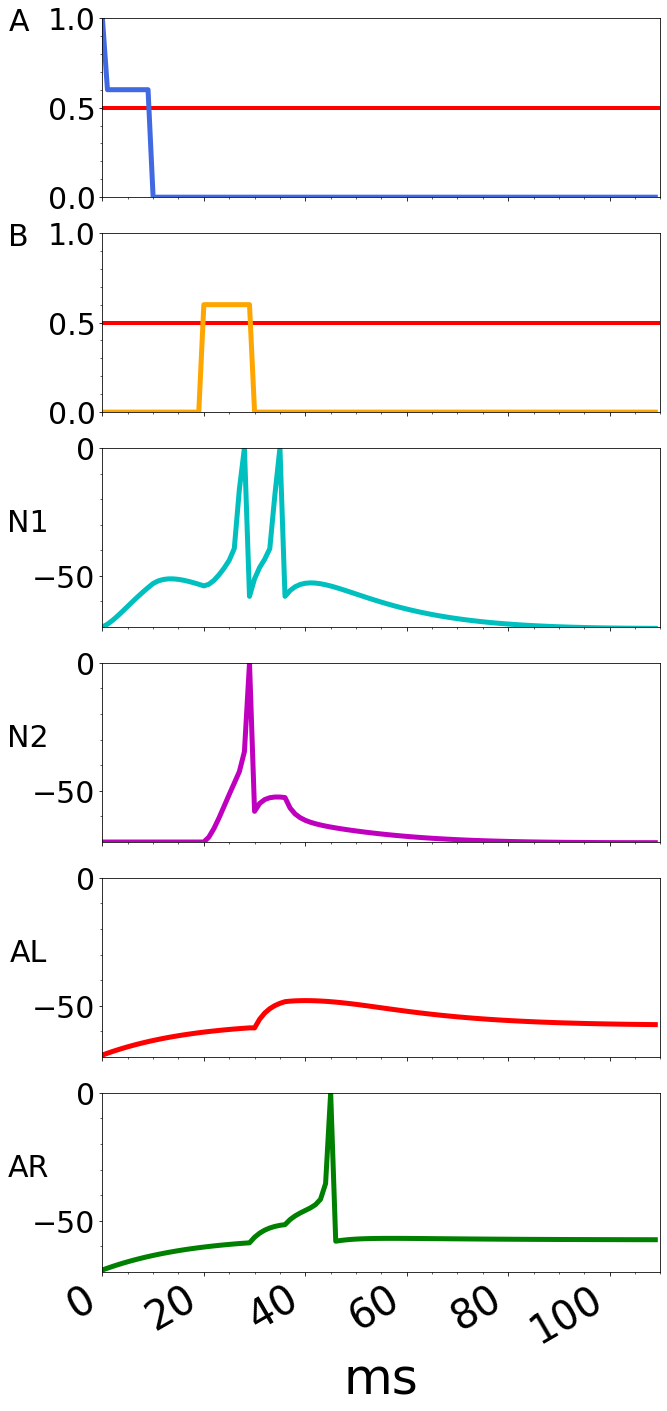

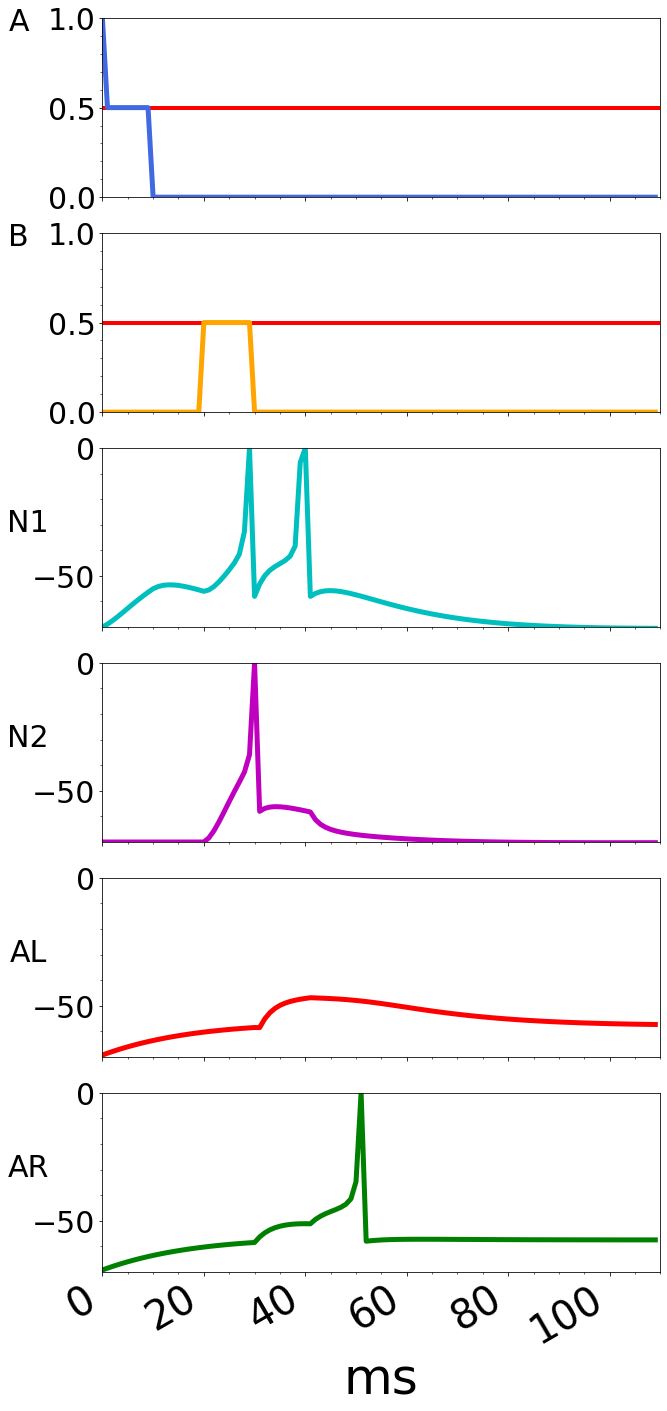

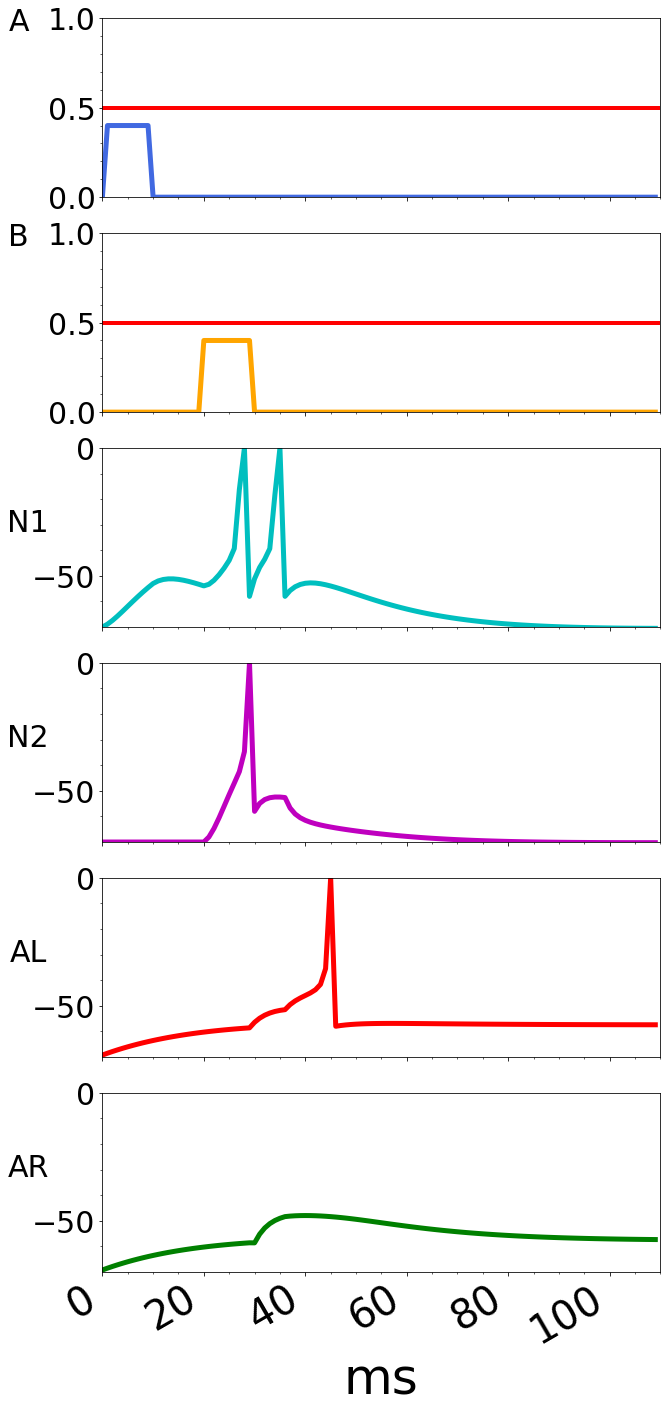

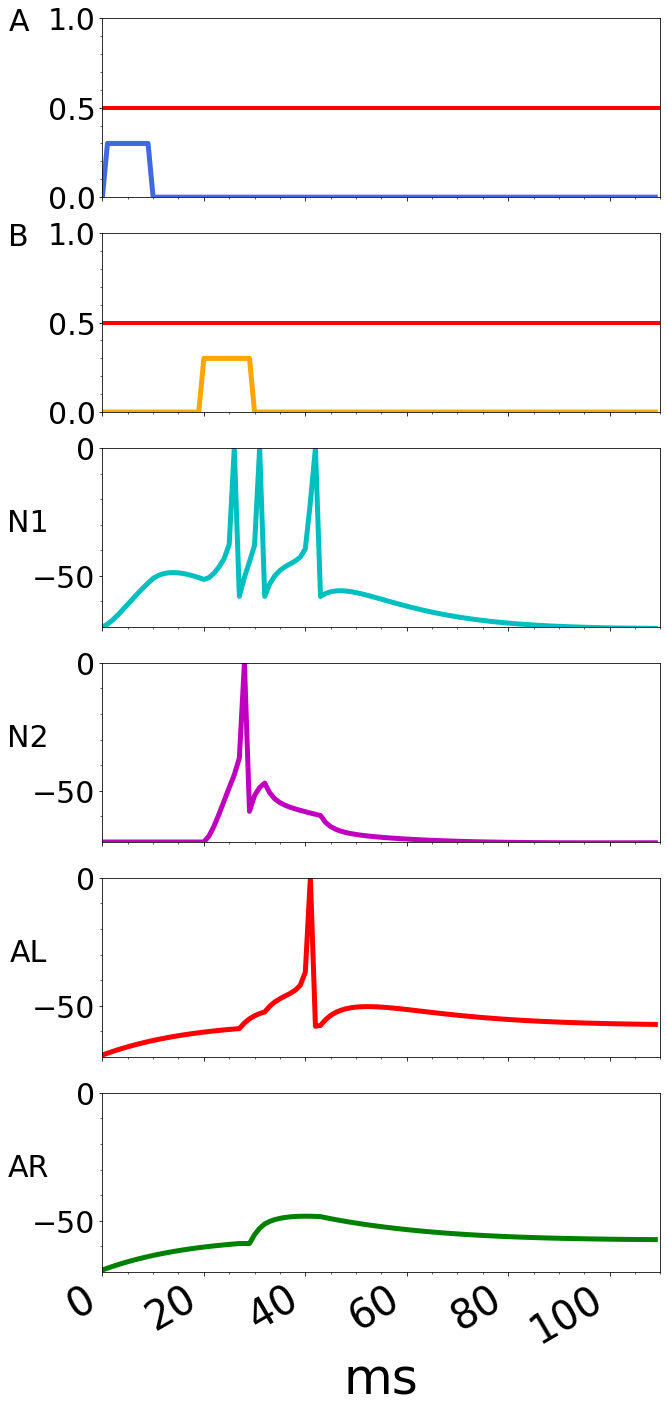

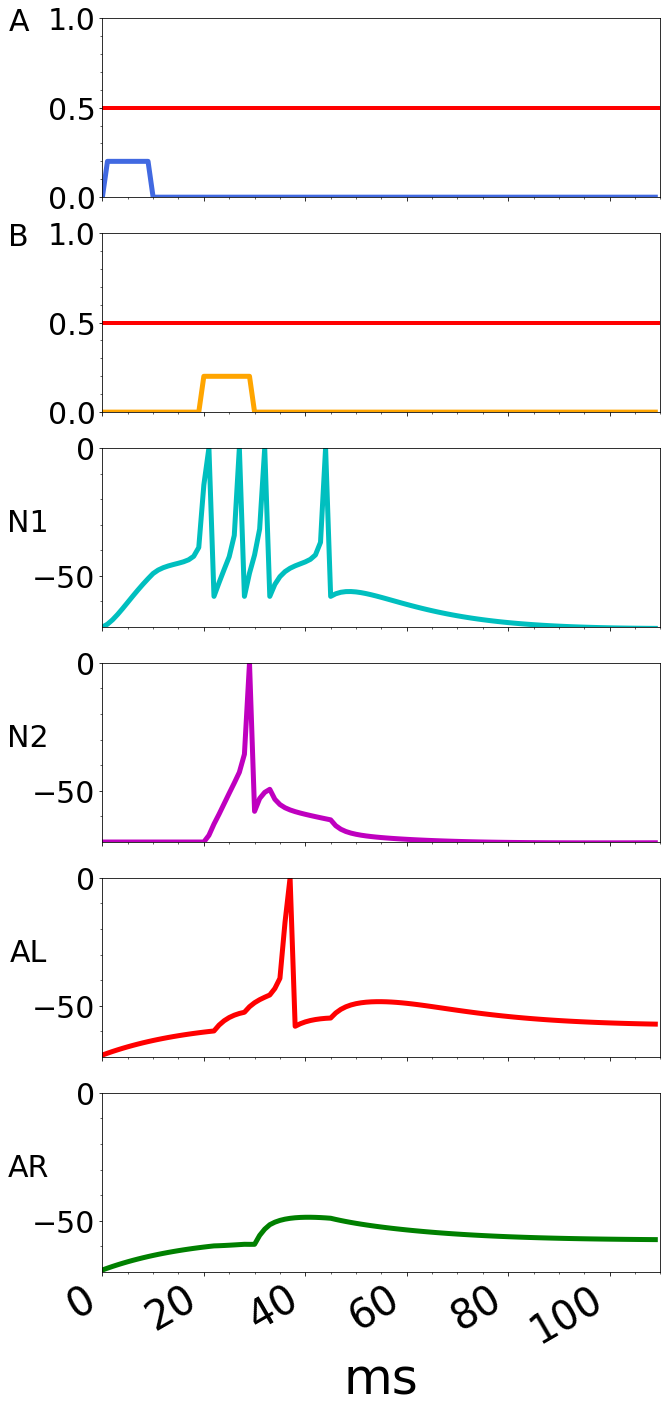

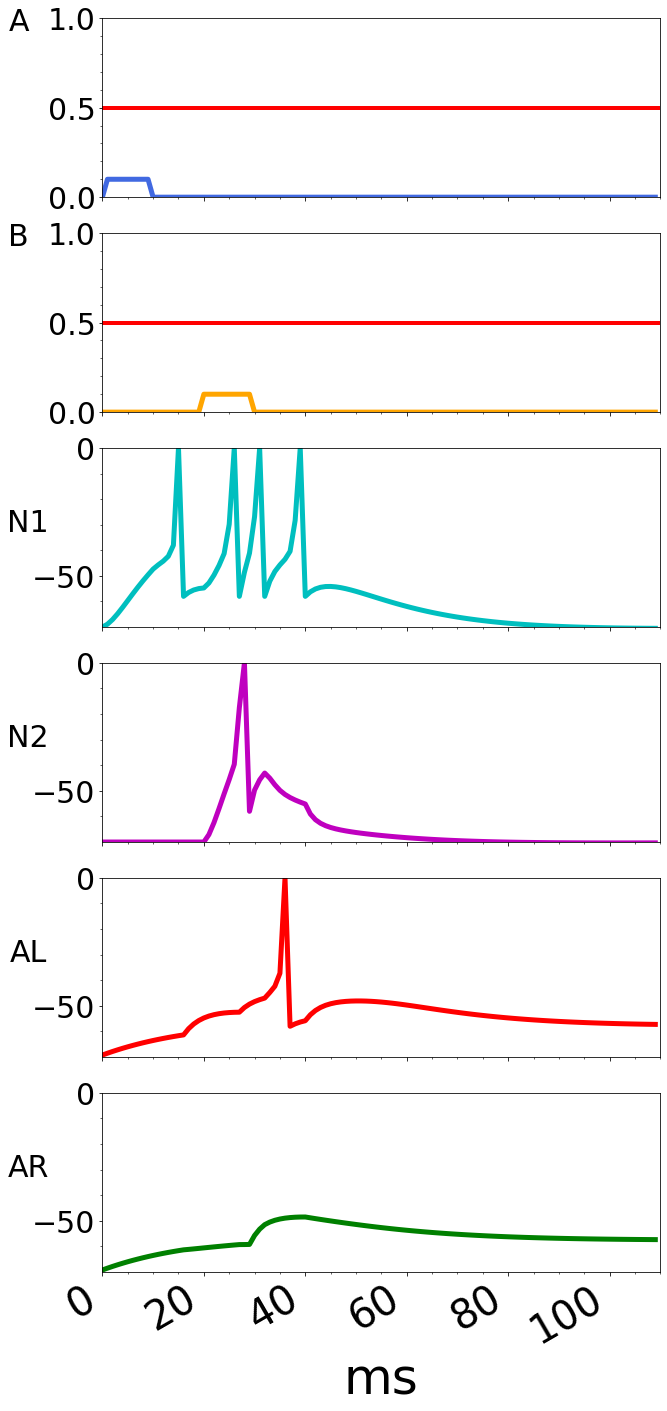

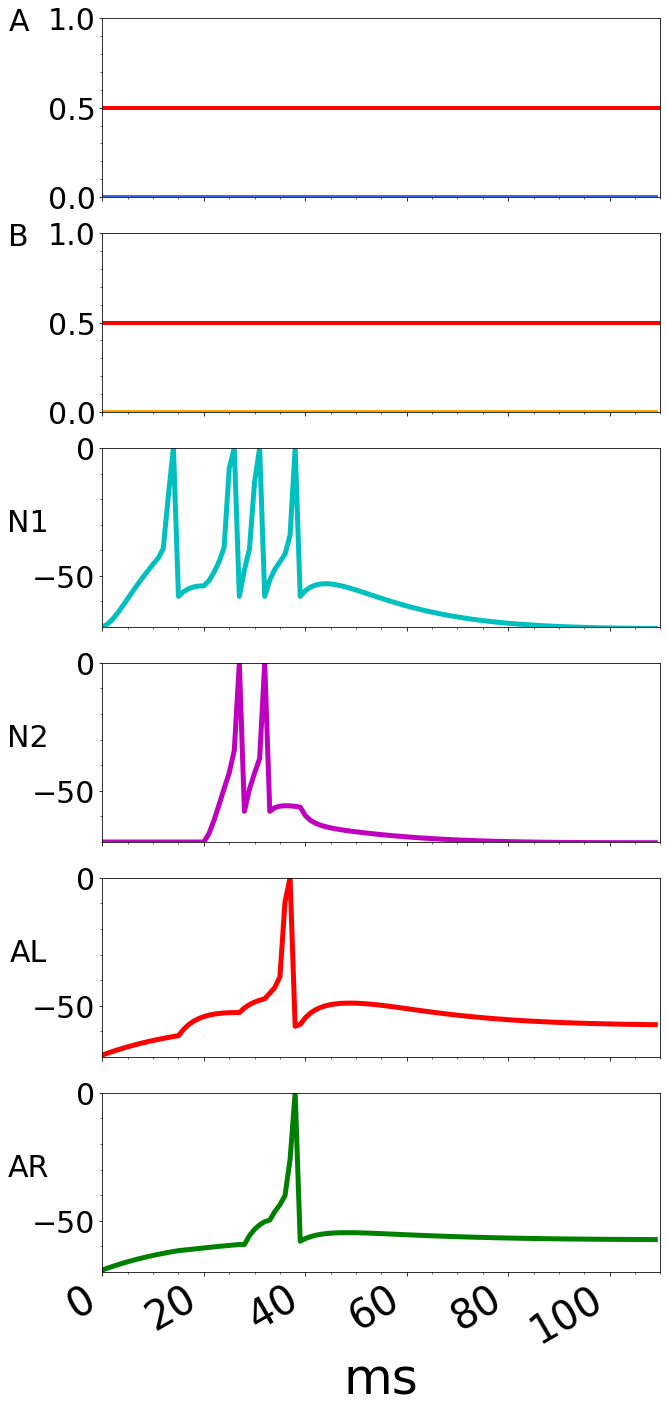

In [8]:
lvl=0
k=0.9
for lv in range(10):
    
    if(k>0.5):
        ax = df[lvl:lvl+110].plot(figsize=(10, 30), subplots=True, layout = (7,1),style=['royalblue','orange','c','m','red','green'], legend = False,sharex=True, lw=5, grid=False)
    else:
        ax = df1[lvl:lvl+110].plot(figsize=(10, 30), subplots=True, layout = (7,1),style=['royalblue','orange','c','m','red','green'], legend = False,sharex=True, lw=5, grid=False)
    
        
    ax = ax.flatten()
    ax[5].set_xlabel('ms',fontsize = 50)
    ax[5].set_ylim([-70,0])
    for i in range(6):
        ax[i].tick_params(axis="y", labelsize=30)
        ax[i].set_axisbelow(True)
        # Turn on the minor TICKS, which are required for the minor GRID
        ax[i].minorticks_on()
        # Customize the major grid
       # ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='grey')
        # Customize the minor grid
      #  ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    for i in range(2,7):
        ax[i].set_ylim([-70,0])
    
    ax[0].set_ylim([0,1])
    ax[1].set_ylim([0,1])
    ax[0].set_ylabel('A',fontsize = 30, rotation=0)
    ax[0].yaxis.set_label_coords(-.15, .9)
    ax[1].yaxis.set_label_coords(-.15, .9)
    ax[1].set_ylabel('B',fontsize = 30, rotation=0)
    ax[2].set_ylabel('N1',fontsize = 30, rotation=0)
    ax[3].set_ylabel('N2',fontsize = 30, rotation=0)
    ax[4].set_ylabel('AL',fontsize = 30, rotation=0)
    ax[5].set_ylabel('AR',fontsize = 30, rotation=0)
    ax[6].set_ylabel('mV', fontsize = 50, rotation=0)
    ax[5].tick_params(axis="x", labelsize=40) 
    ax[0].margins(0.0)
    ax[0].hlines(y=0.5,xmin=0, xmax=110, linewidth=4, color='r')
    ax[1].hlines(y=0.5,xmin=0, xmax=110, linewidth=4, color='r')
    #ax.subplots[1](legend=False)
    #plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    stri='level_%.2f'%k
    plt.savefig(stri+'_AB.pdf')
    k-=0.1
    lvl=lvl+110

In [ ]:

ax = df[:9000].plot(figsize=(30, 60), subplots=True, layout = (10,1), legend = False,sharex=True, lw=5, grid=False)
ax = ax.flatten()
#ax[6].set_xlabel('ms',fontsize = 50)
ax[0].set_ylim([0,1])
ax[1].set_ylim([0,1])
ax[0].hlines(y=0.5,xmin=0, xmax=9000, linewidth=4, color='r')
ax[1].hlines(y=0.5,xmin=0, xmax=9000, linewidth=4, color='r')
for i in range(9):
    ax[i].tick_params(axis="y", labelsize=30)
    ax[i].set_axisbelow(True)
    # Turn on the minor TICKS, which are required for the minor GRID
    ax[i].minorticks_on()
    # Customize the major grid
  #  ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='grey')
    # Customize the minor grid
  #  ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
#for i in range(2,10):
    #ax[i].set_ylim([-70,0])
ax[2].set_ylabel('mV', fontsize = 50)
ax[8].tick_params(axis="x", labelsize=40) 
ax[0].margins(0.0)
#ax.subplots[1](legend=False)
#plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig('spikeTrains_mixed.pdf')